<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(<matplotlib.image.AxesImage at 0x7ff13096b430>,
 Text(0.5, 1.0, 'template image'))

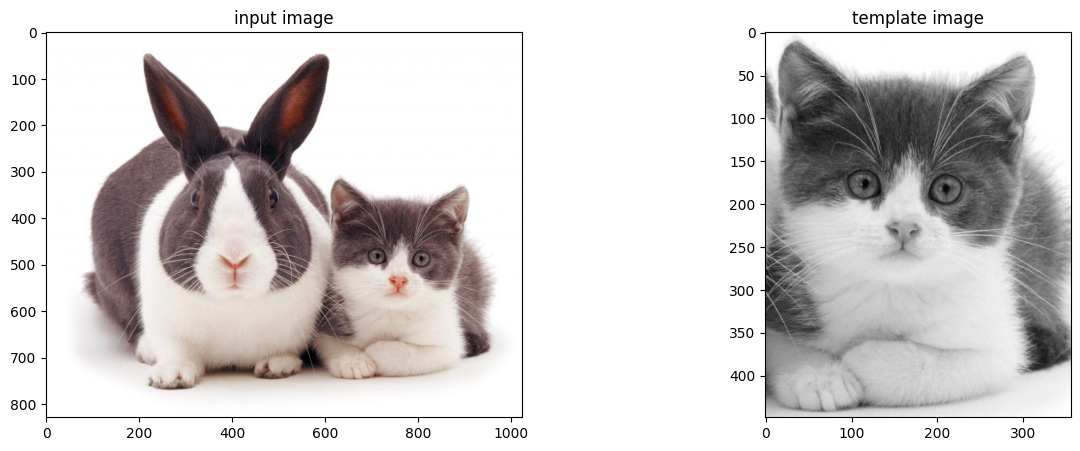

In [7]:
img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

template = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

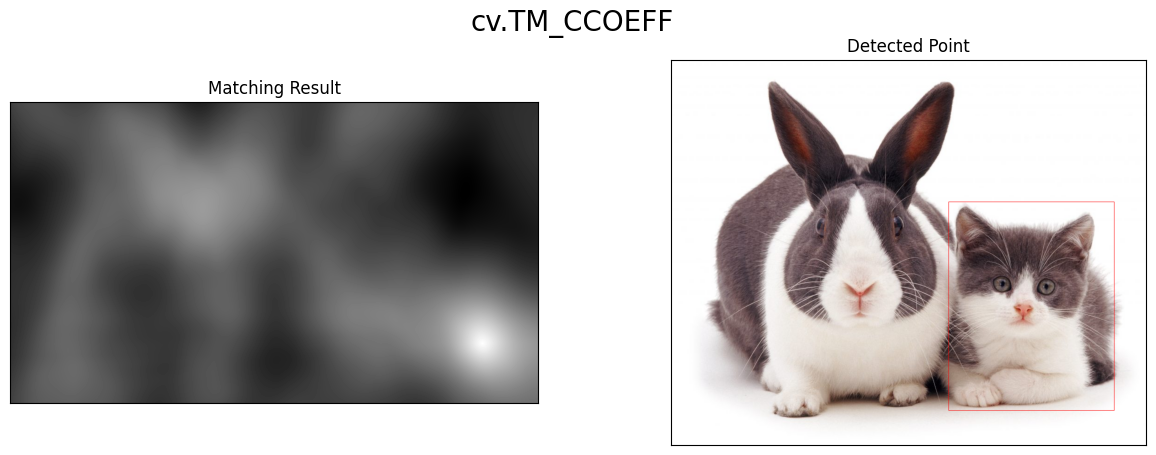

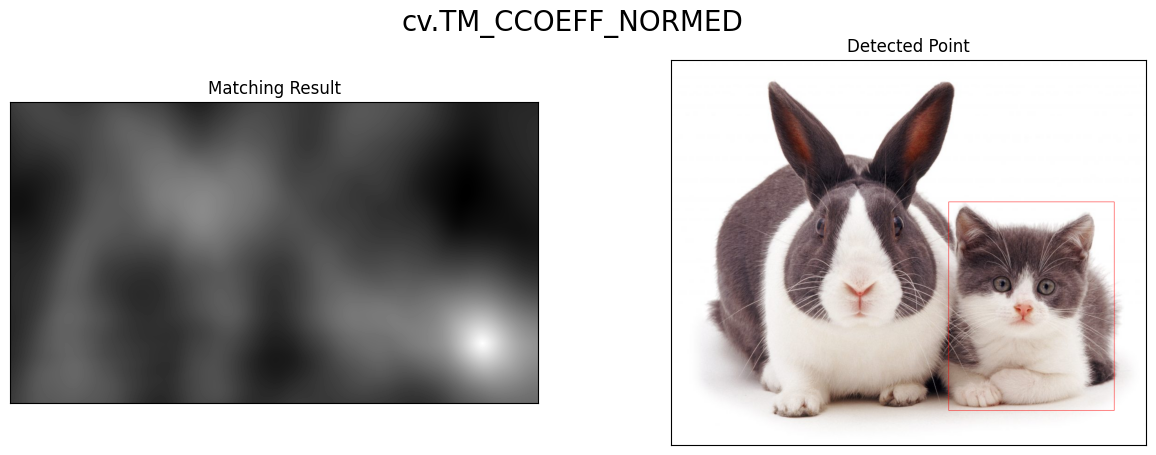

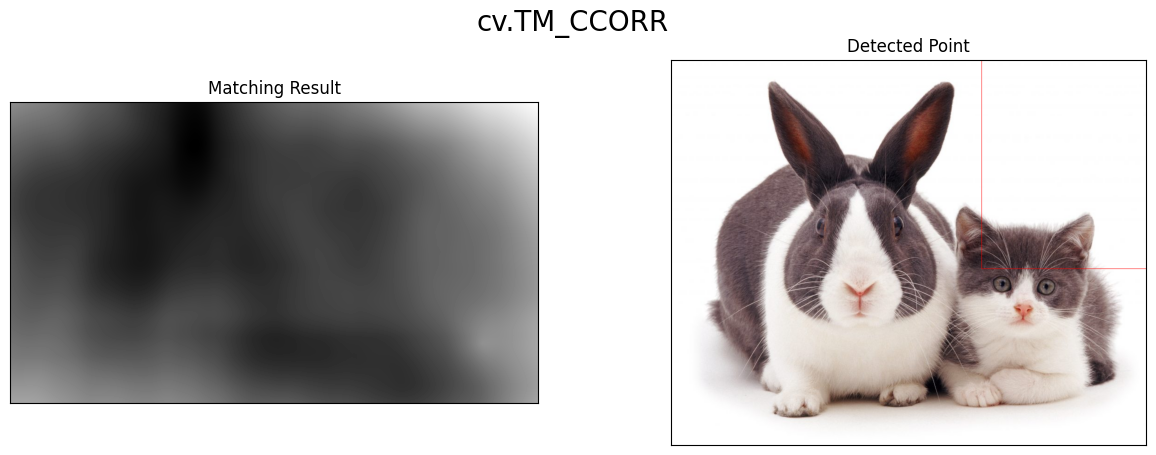

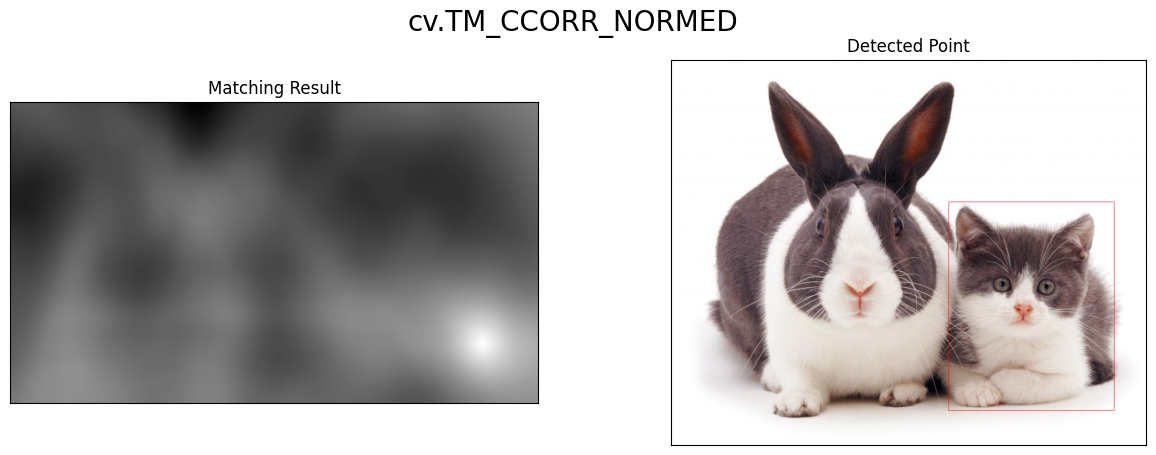

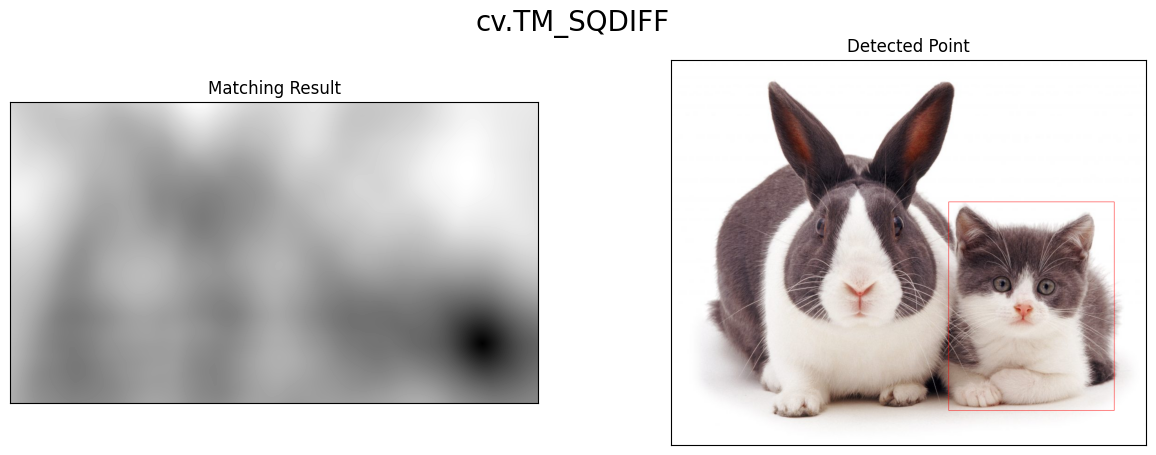

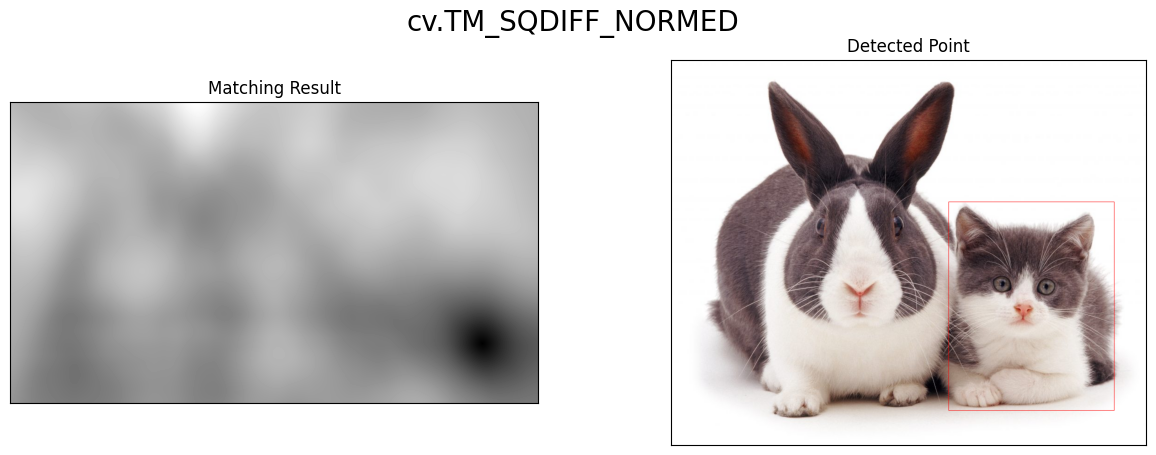

In [8]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

(<matplotlib.image.AxesImage at 0x7ff16c33a650>,
 Text(0.5, 1.0, 'template image'))

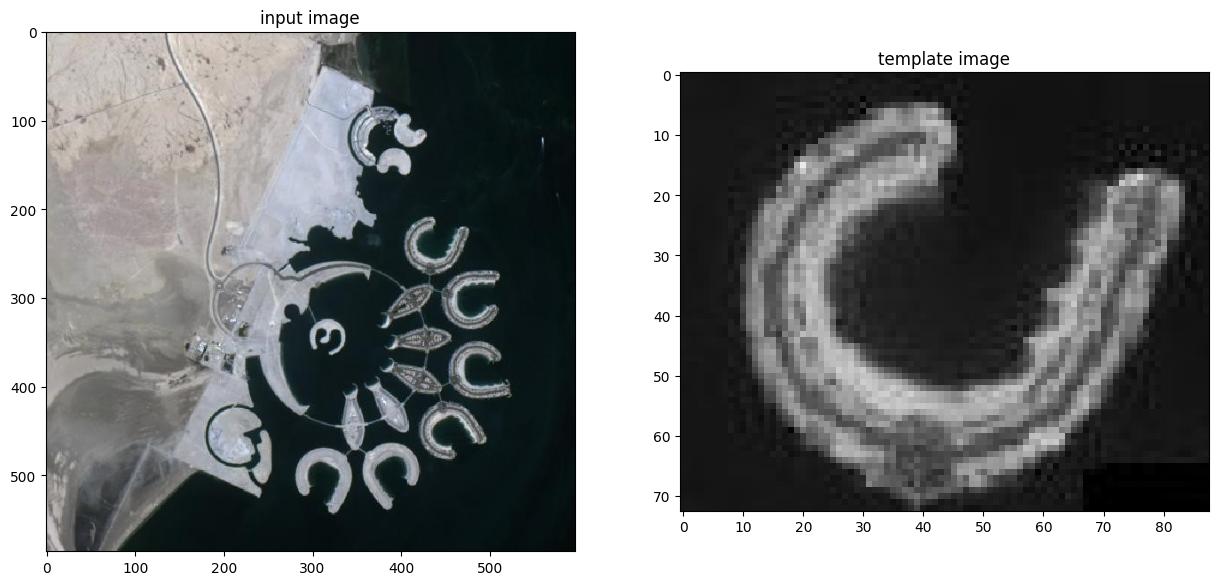

In [11]:
img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

template = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/bahrain-template.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt.subplots(1,2,figsize=(15,35))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

total objects found  6


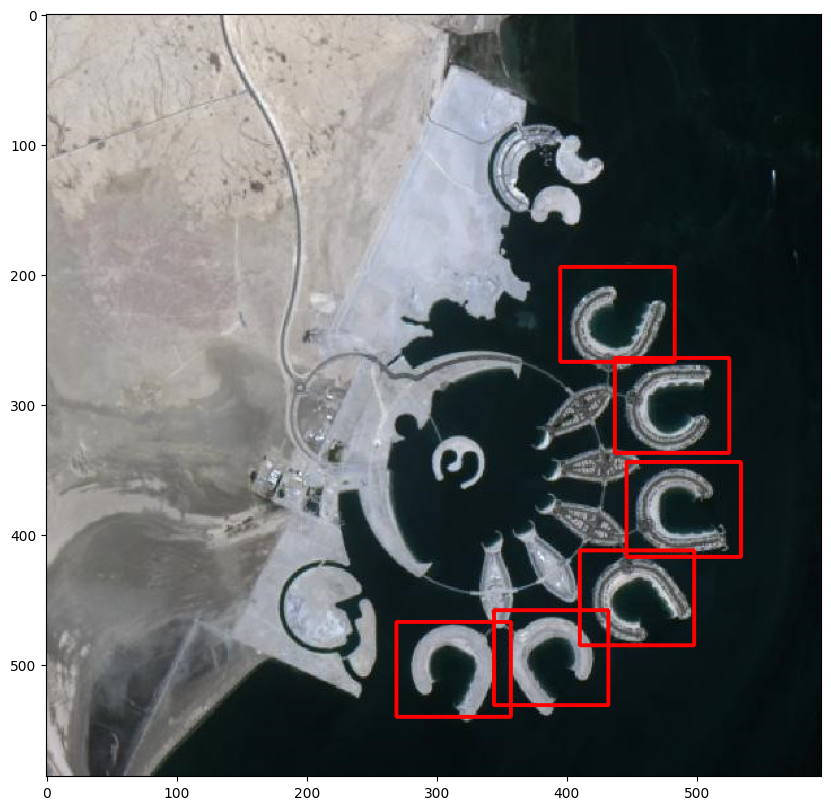

In [12]:
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where( res >= threshold)

lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

		for i in range(((pt[0])-9), ((pt[0])+9),1):
			lspoint.append(i)

		for k in range(((pt[1])-9), ((pt[1])+9),1):
			lspoint2.append(k)
		count+=1
	else:
		continue
print ("total objects found ", count)

plt.figure(figsize=(10,45))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

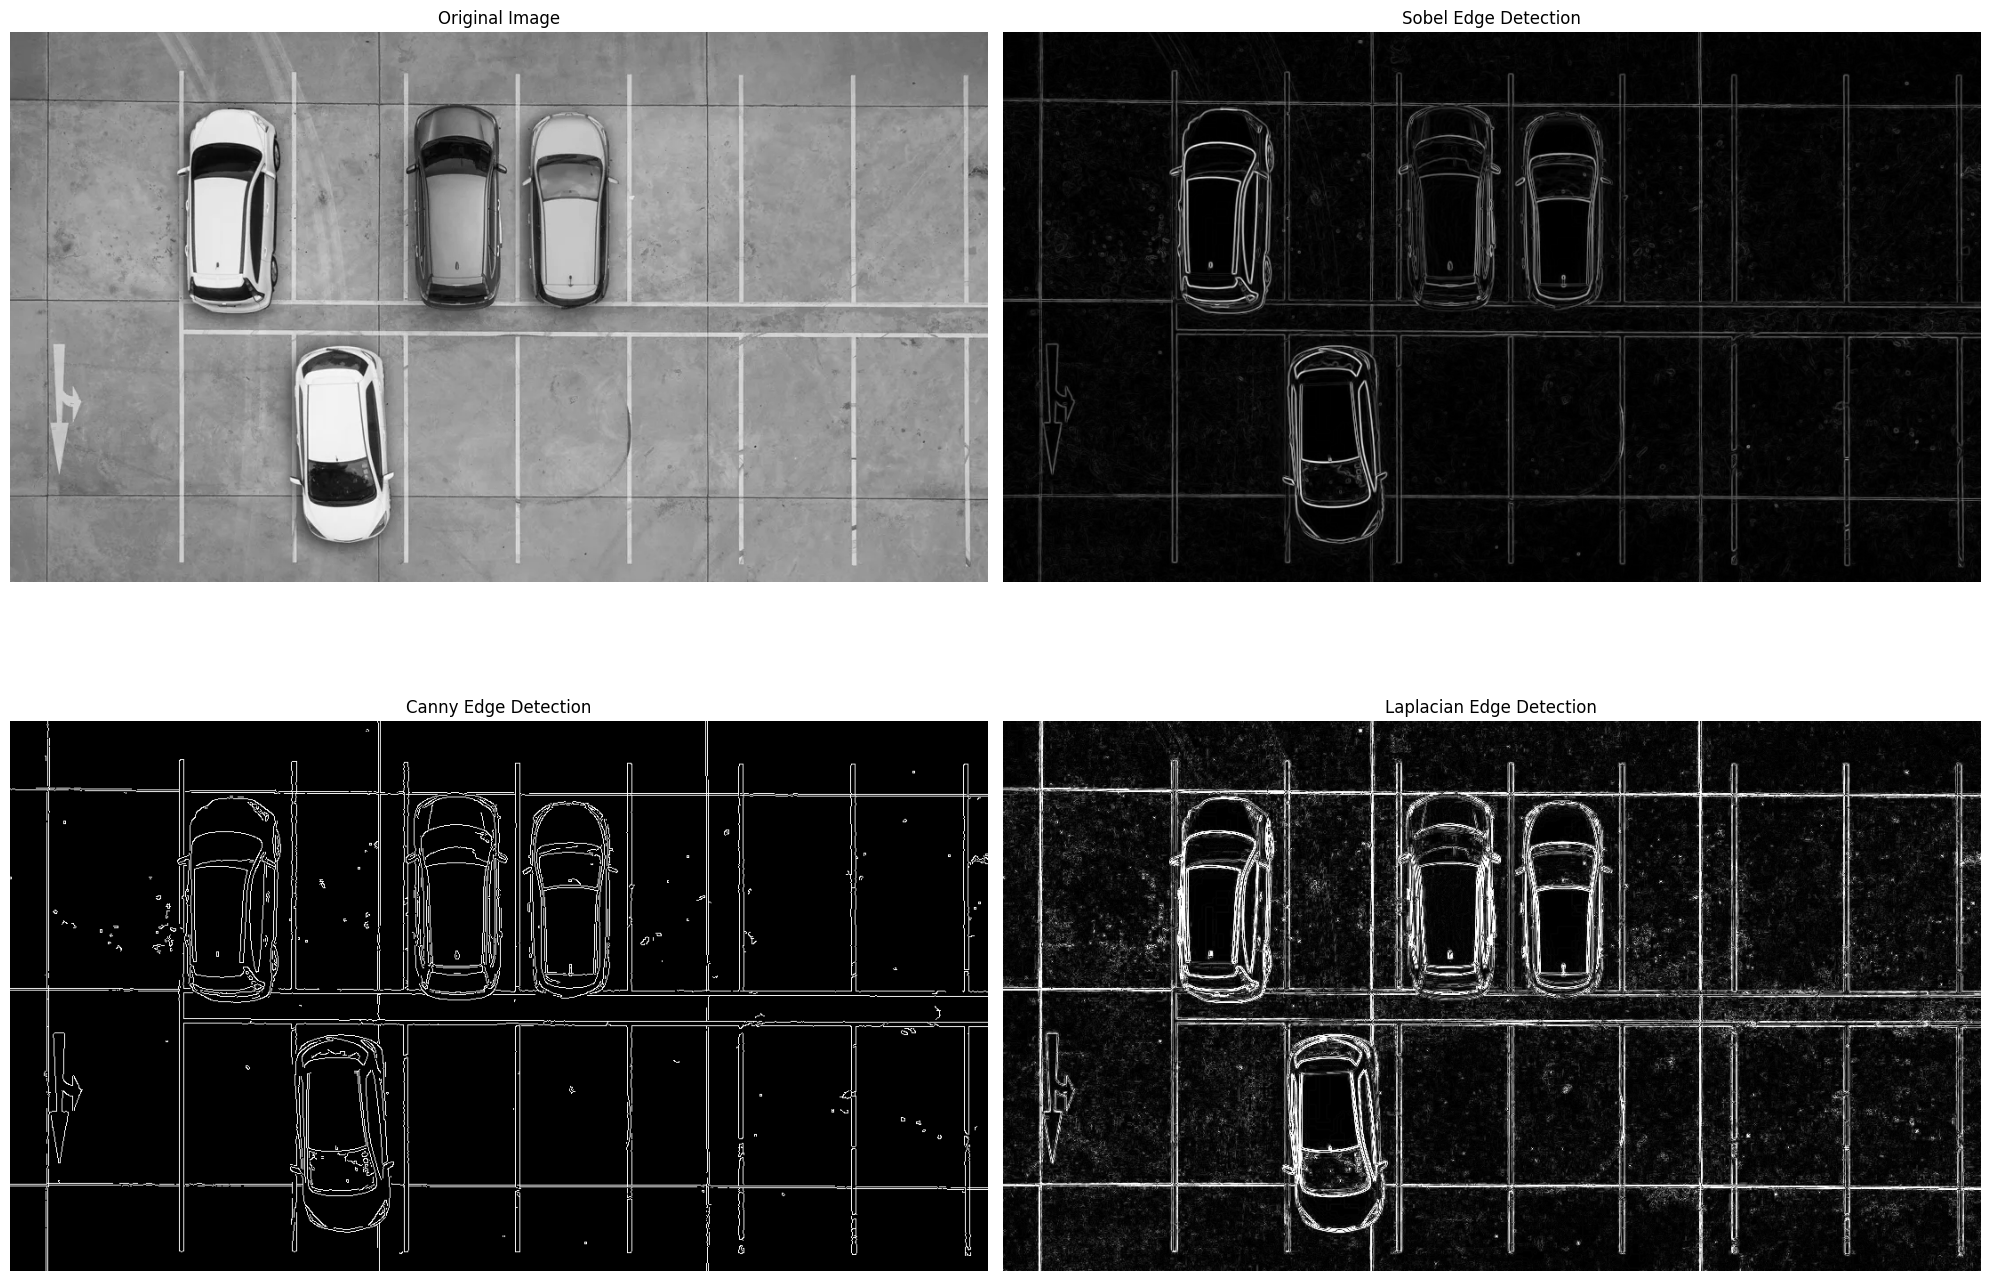

In [22]:
# Load the image
img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_combined = cv.magnitude(sobel_x, sobel_y)    # Combined Sobel

# Canny Edge Detection
canny_edges = cv.Canny(img, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=3)
laplacian_abs = cv.convertScaleAbs(laplacian)  # Convert to absolute scale

# Plot the images
plt.figure(figsize=(20, 15))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Edge Detection
plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Canny Edge Detection
plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Laplacian Edge Detection
plt.subplot(2, 2, 4)
plt.imshow(laplacian_abs, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

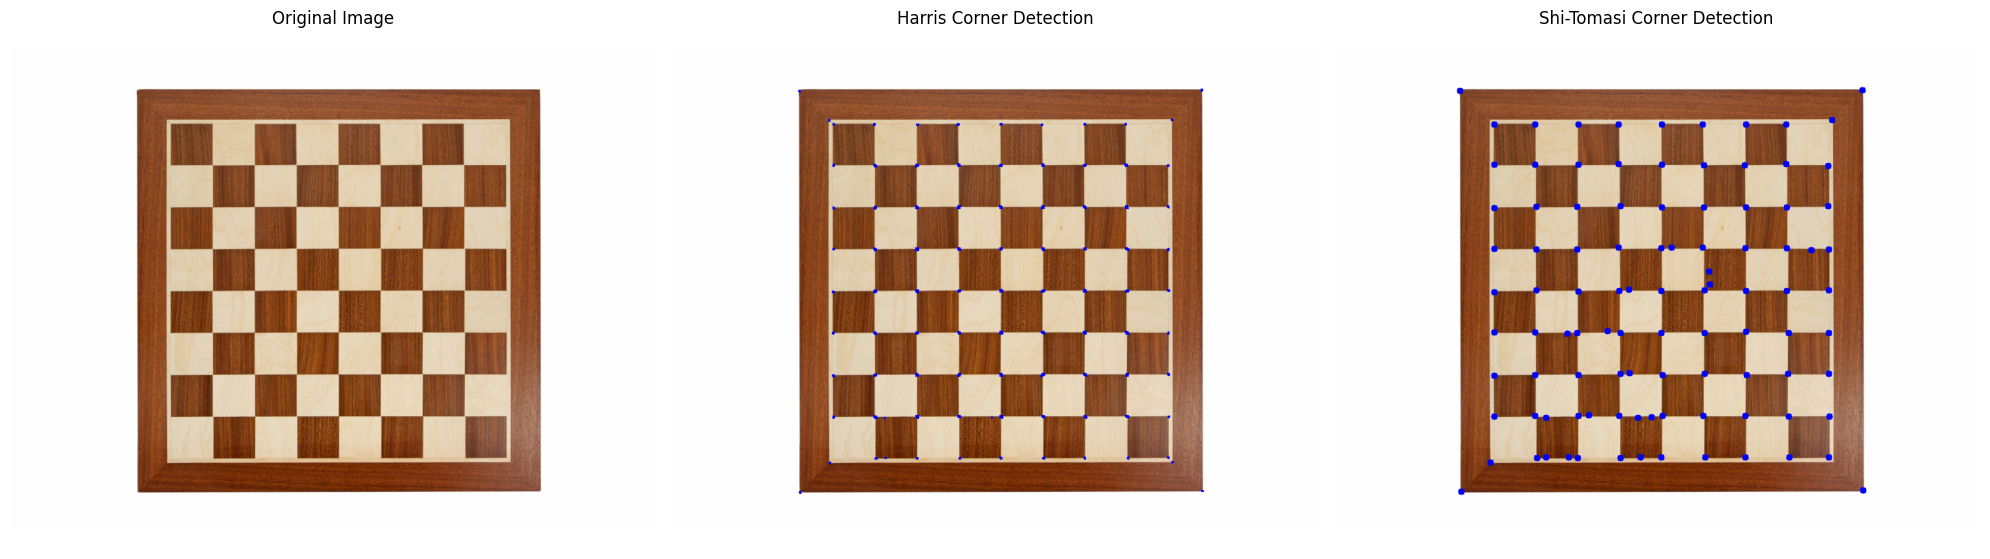

In [27]:
img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray_harris = np.float32(gray)
harris_corners = cv.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)
harris_dilated = cv.dilate(harris_corners, None)

img_harris = img.copy()
img_harris[harris_dilated > 0.01 * harris_dilated.max()] = [255, 0, 0]

shi_tomasi_corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.intp(shi_tomasi_corners)

img_shi_tomasi = img.copy()
for i in shi_tomasi_corners:
    x, y = i.ravel()
    cv.circle(img_shi_tomasi, (x, y), 5, (255, 0, 0), -1)


plt.figure(figsize=(20, 15))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Harris Corner Detection Image
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

# Shi-Tomasi Corner Detection Image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


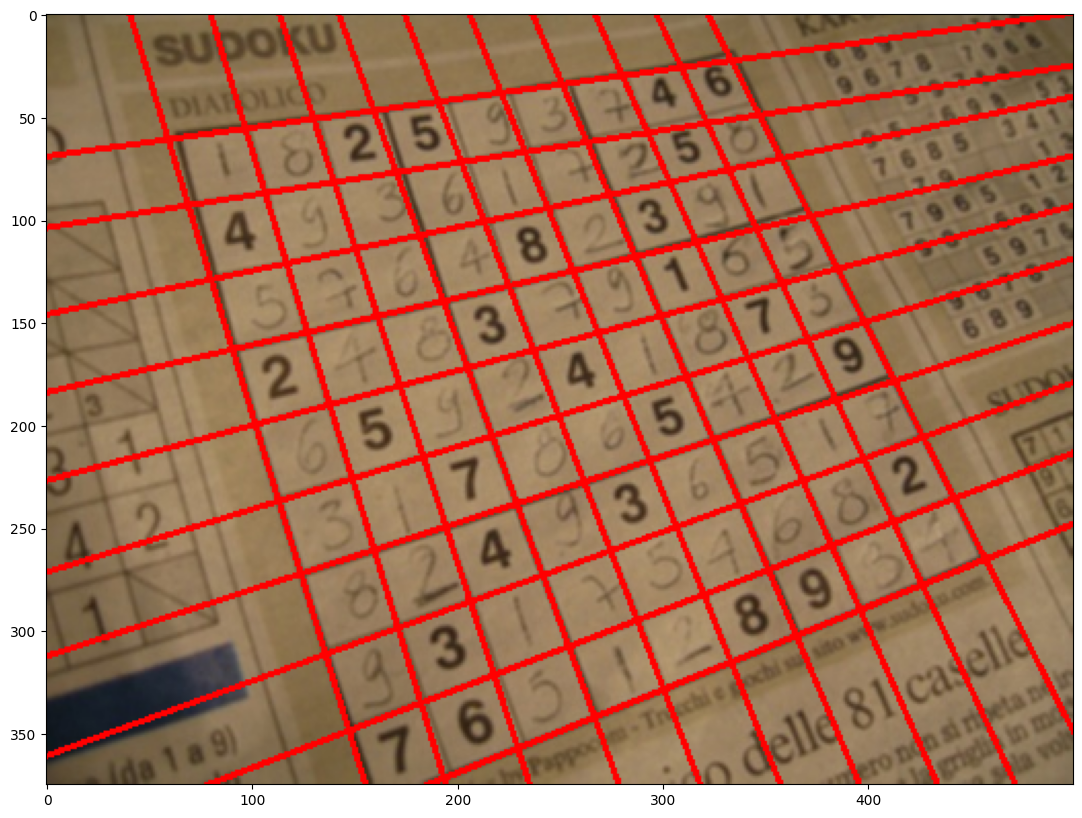

In [28]:
input_img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('Garis tidak ditemukan')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

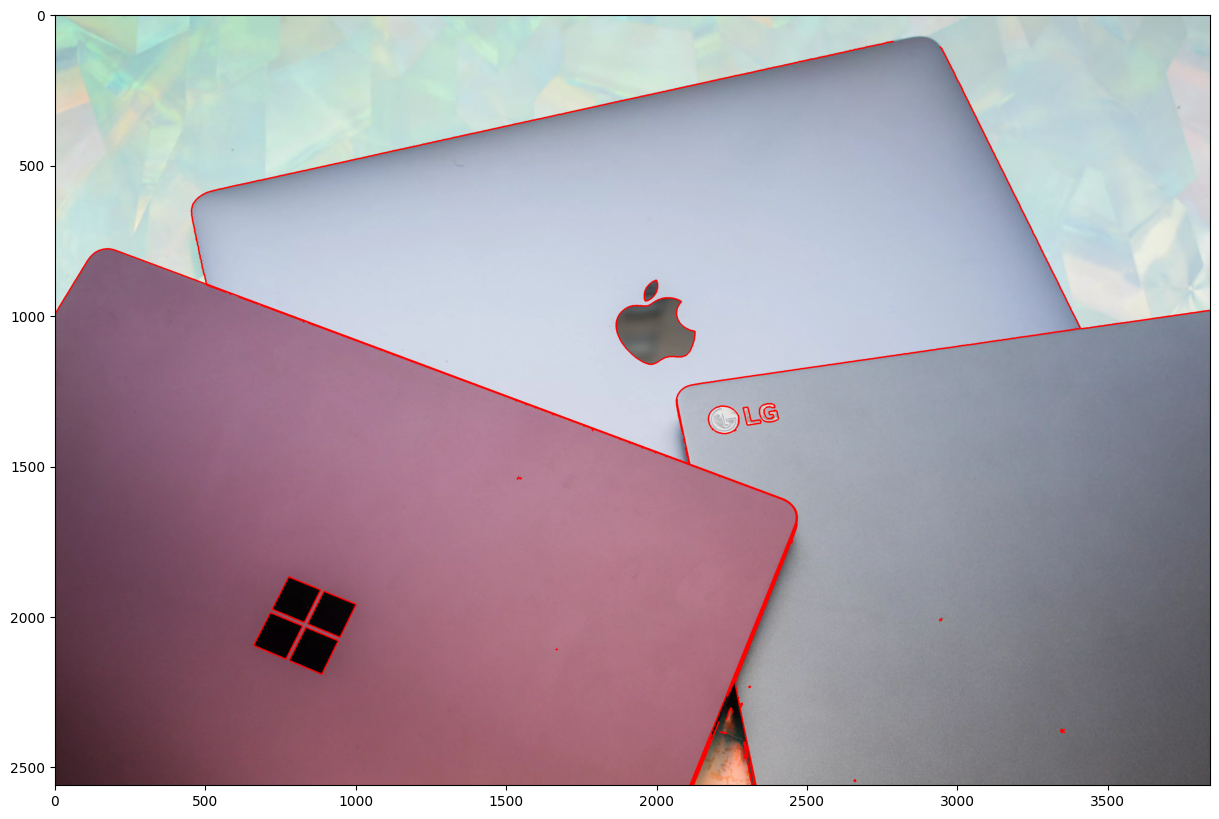

In [29]:
img = cv.imread('/content/drive/MyDrive/pcvk/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [33]:
src = cv.imread('/content/drive/MyDrive/pcvk/KTP_More/ktp4.png')
blurred = src.copy()
gray = blurred.copy()

# filtering
for i in range(10):
    blurred = cv.GaussianBlur(src, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

168.0 (300, 493)


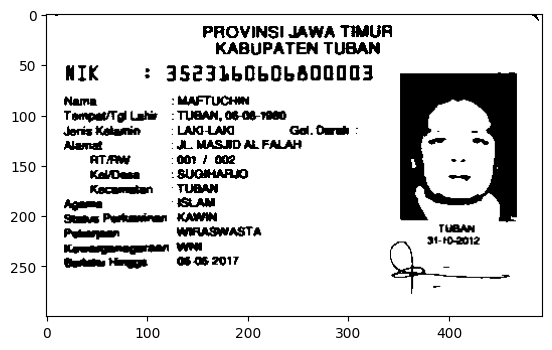

In [34]:
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)
plt.imshow(bw, cmap='gray')

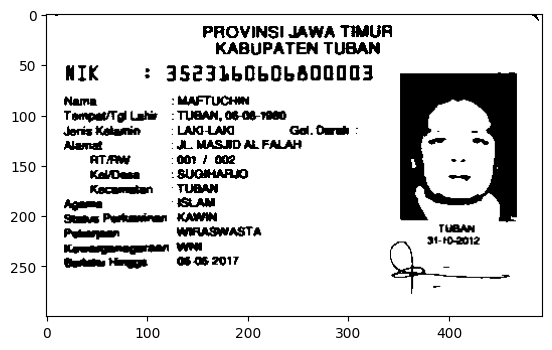

In [36]:
# Morfologi opening
kernel = np.ones((1,1),np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_OPEN, kernel)
plt.imshow(opened, cmap='grey')

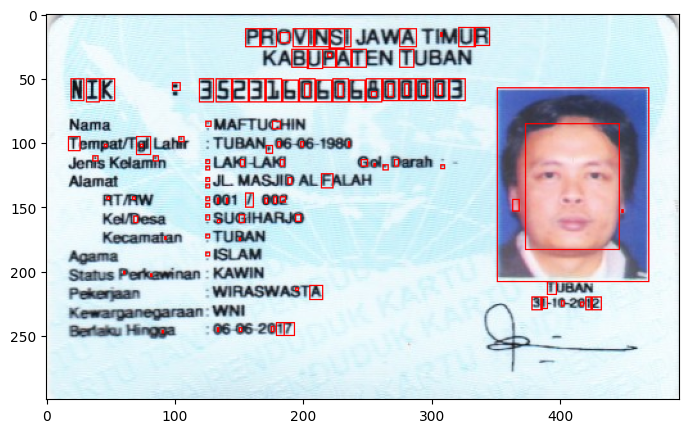

In [37]:
blurred = cv.GaussianBlur(src, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))